In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Data Processing

In [0]:
df_train = pd.read_csv('Google_Stock_Price_Train.csv')

In [3]:
df_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [0]:
train_set = df_train.iloc[:, 1:2].values

In [5]:
train_set.shape

(1258, 1)

In [7]:
train_set[:5]

array([[325.25],
       [331.27],
       [329.83],
       [328.34],
       [322.04]])

In [0]:
from sklearn.preprocessing import MinMaxScaler
minmax_sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = minmax_sc.fit_transform(train_set)

In [11]:
training_set_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [0]:
X_train = []
y_train = []
for i in range(60,1258):
  X_train.append(training_set_scaled[i-60:i, 0])
  y_train.append(training_set_scaled[i,0])

In [16]:
print("LENGTH OF x_train:",len(X_train),", y_train",len(y_train))

LENGTH OF x_train: 1198 , y_train 1198


In [19]:
X_train[:2]

[array([0.08581368, 0.09701243, 0.09433366, 0.09156187, 0.07984225,
        0.0643277 , 0.0585423 , 0.06568569, 0.06109085, 0.06639259,
        0.0614257 , 0.07474514, 0.02797827, 0.02379269, 0.02409033,
        0.0159238 , 0.01078949, 0.00967334, 0.01642607, 0.02100231,
        0.02280676, 0.02273235, 0.02810849, 0.03212665, 0.0433812 ,
        0.04475779, 0.04790163, 0.0440695 , 0.04648783, 0.04745517,
        0.04873875, 0.03936305, 0.04137213, 0.04034898, 0.04784582,
        0.04325099, 0.04356723, 0.04286033, 0.04602277, 0.05398467,
        0.05738894, 0.05714711, 0.05569611, 0.04421832, 0.04514845,
        0.04605997, 0.04412531, 0.03675869, 0.04486941, 0.05065481,
        0.05214302, 0.05612397, 0.05818885, 0.06540665, 0.06882953,
        0.07243843, 0.07993526, 0.07846566, 0.08034452, 0.08497656]),
 array([0.09701243, 0.09433366, 0.09156187, 0.07984225, 0.0643277 ,
        0.0585423 , 0.06568569, 0.06109085, 0.06639259, 0.0614257 ,
        0.07474514, 0.02797827, 0.02379269, 0.

In [0]:
X_train, y_train = np.array(X_train), np.array(y_train)

In [21]:
X_train

array([[0.08581368, 0.09701243, 0.09433366, ..., 0.07846566, 0.08034452,
        0.08497656],
       [0.09701243, 0.09433366, 0.09156187, ..., 0.08034452, 0.08497656,
        0.08627874],
       [0.09433366, 0.09156187, 0.07984225, ..., 0.08497656, 0.08627874,
        0.08471612],
       ...,
       [0.92106928, 0.92438053, 0.93048218, ..., 0.95475854, 0.95204256,
        0.95163331],
       [0.92438053, 0.93048218, 0.9299055 , ..., 0.95204256, 0.95163331,
        0.95725128],
       [0.93048218, 0.9299055 , 0.93113327, ..., 0.95163331, 0.95725128,
        0.93796041]])

In [22]:
y_train

array([0.08627874, 0.08471612, 0.07454052, ..., 0.95725128, 0.93796041,
       0.93688146])

In [23]:
print(X_train.shape, y_train.shape)

(1198, 60) (1198,)


## Reshaping

In [0]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [25]:
X_train.shape

(1198, 60, 1)

## Building the RNN

In [0]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

In [0]:
regressor = Sequential()

In [0]:
N = 50
regressor.add(LSTM(units=N, return_sequences=True, input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))

In [0]:
regressor.add(LSTM(units=N, return_sequences=True))
regressor.add(Dropout(0.2))

In [0]:
regressor.add(LSTM(units=N, return_sequences=True))
regressor.add(Dropout(0.2))

In [0]:
regressor.add(LSTM(units=N))
regressor.add(Dropout(0.2))

In [0]:
regressor.add(Dense(units=1))
regressor.compile(optimizer='adam', loss='mean_squared_error')

In [37]:
regressor.fit(X_train, y_train, epochs=100, batch_size=32)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
1198/1198 [==============================] - 15s 13ms/step - loss: 0.0547
Epoch 2/100
1198/1198 [==============================] - 9s 8ms/step - loss: 0.0068
Epoch 3/100
1198/1198 [==============================] - 10s 8ms/step - loss: 0.0069
Epoch 4/100
1198/1198 [==============================] - 9s 8ms/step - loss: 0.0060
Epoch 5/100
1198/1198 [==============================] - 9s 8ms/step - loss: 0.0055
Epoch 6/100
1198/1198 [==============================] - 9s 8ms/step - loss: 0.0056
Epoch 7/100
1198/1198 [==============================] - 9s 8ms/step - loss: 0.0055
Epoch 8/100
1198/1198 [==============================] - 9s 8ms/step - loss: 0.0048
Epoch 9/100
1198/1198 [==============================] - 9s 8ms/step - loss: 0.0049
Epoch 10/100
1198/1198 [==============================] - 9s 8ms/step - loss: 0.0045
Epoch 11/100
1198/1198 [==============================] - 9s 8ms/step - loss: 0.0055
Epoch 12/100
1198/1198 

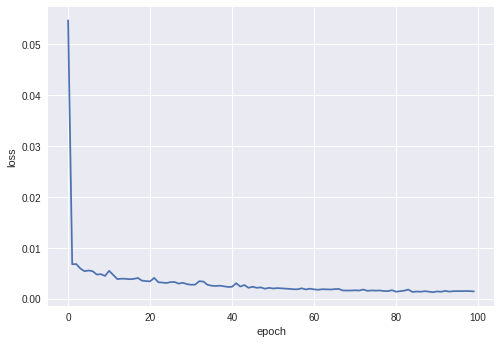

In [39]:
plt.plot(regressor.history.epoch, regressor.history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

## Making prediction

In [0]:
df_test = pd.read_csv('Google_Stock_Price_Test.csv')

In [41]:
df_test.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [0]:
real_stock_price = df_test.iloc[:, 1:2].values

In [43]:
real_stock_price[:5]

array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ]])

In [0]:
df_total = pd.concat((df_train['Open'], df_test['Open']), axis=0)
inputs = df_total[len(df_total)-len(df_test)-60:].values
inputs = inputs.reshape(-1, 1)
inputs = minmax_sc.transform(inputs)

In [45]:
df_total

0       325.25
1       331.27
2       329.83
3       328.34
4       322.04
5       313.70
6       310.59
7       314.43
8       311.96
9       314.81
10      312.14
11      319.30
12      294.16
13      291.91
14      292.07
15      287.68
16      284.92
17      284.32
18      287.95
19      290.41
20      291.38
21      291.34
22      294.23
23      296.39
24      302.44
25      303.18
26      304.87
27      302.81
28      304.11
29      304.63
         ...  
1248    800.40
1249    790.22
1250    796.76
1251    795.84
1252    792.36
1253    790.90
1254    790.68
1255    793.70
1256    783.33
1257    782.75
0       778.81
1       788.36
2       786.08
3       795.26
4       806.40
5       807.86
6       805.00
7       807.14
8       807.48
9       807.08
10      805.81
11      805.12
12      806.91
13      807.25
14      822.30
15      829.62
16      837.81
17      834.71
18      814.66
19      796.86
Name: Open, Length: 1278, dtype: float64

In [46]:
inputs

array([[0.9299055 ],
       [0.93113327],
       [0.92750577],
       [0.94415507],
       [0.93876032],
       [0.93403527],
       [0.93483518],
       [0.9313937 ],
       [0.94636878],
       [0.96569685],
       [0.97510976],
       [0.95966962],
       [0.97808617],
       [1.        ],
       [0.98076494],
       [0.97083116],
       [0.98450406],
       [0.96054394],
       [0.9371419 ],
       [0.92841729],
       [0.90804747],
       [0.8771858 ],
       [0.92153434],
       [0.93809063],
       [0.93165414],
       [0.95254483],
       [0.88812412],
       [0.88637547],
       [0.87032145],
       [0.88563137],
       [0.90743359],
       [0.91571173],
       [0.89941588],
       [0.91805566],
       [0.9089404 ],
       [0.9024853 ],
       [0.89456061],
       [0.91600938],
       [0.9132934 ],
       [0.88979835],
       [0.86589404],
       [0.89030062],
       [0.90335962],
       [0.89642086],
       [0.91777662],
       [0.93176576],
       [0.94114145],
       [0.957

In [47]:
inputs.shape

(80, 1)

In [0]:
X_test = []
for i in range(60, 80):
  X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = minmax_sc.inverse_transform(predicted_stock_price)

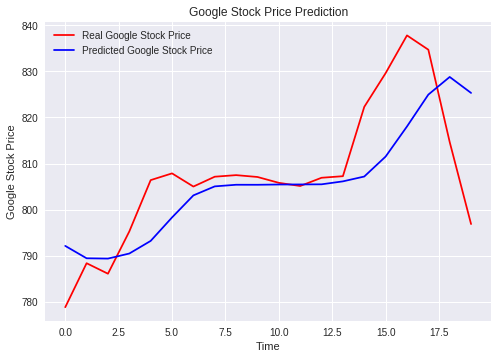

In [49]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()